In [1104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import kaggle
import seaborn as sns


In [1105]:
dataset = 'pavansubhasht/ibm-hr-analytics-attrition-dataset'
destination = './data'

kaggle.api.dataset_download_files(dataset, path=destination, unzip=True)

# Lire le dataset

data = pd.read_csv(f'{destination}/WA_Fn-UseC_-HR-Employee-Attrition.csv')

print(data.head())


Dataset URL: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1 

In [1106]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [1107]:
data['Attrition'].isnull().sum()

0

In [1108]:
data.shape

(1470, 35)

In [1109]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

**C'est un rapport d'analyse des données sur l'attrition des employés d'une entreprise. L'objectif est d'identifier les facteurs clés qui influencent la décision des employés de quitter ou de rester dans l'entreprise.**

<p style="color:green; font-weight:bold; font-size: 30px">Relations entre fonctionnalités et variables</p>

Ce jeu de données contient des informations sur les employés d'une entreprise, 
avec des variables démographiques, liées à l'emploi et à la satisfaction au travail.


| Variable | Type | Exemple de valeurs | Description |
|---|---|---|---|
| **`Age`** | Numérique - Discrète | 41, 49, 37, 33, 27  | Âge de l'employé |
| **`Attrition`** | Catégorique | Oui, Non | Indique si l'employé a quitté l'entreprise |
| **`BusinessTravel`** | Catégorique |  Rarement, Fréquemment, Jamais | Fréquence des voyages d'affaires |
| **`DailyRate`** | Numérique - Discrète | 1102, 279, 1373, 1392, 591 | Taux journalier de l'employé (salaire ou allocation) |
| **`Department`** | Catégorique | Ventes, Recherche & Développement | Département de l'employé |
| **`DistanceFromHome`** | Numérique - Discrète | 1, 8, 2, 3, 2 | Distance entre le domicile et le lieu de travail |
| **`Education`** | Catégorique | 1, 2, 3, 4, 5 | Niveau d'éducation (1: Lycée, 2: Licence, etc.) |
| **`EducationField`** | Catégorique | Sciences de la vie, Médecine, Marketing | Domaine d'études |
| **`EmployeeCount`** | Numérique - Discrète | 1 | Nombre d'employés (probablement redondant ou erroné) |
| **`EmployeeNumber`** | Numérique - Discrète | 1, 2, 4, 5, 7 | Identifiant unique de l'employé |
| **`EnvironmentSatisfaction`** | Catégorique | 1, 2, 3, 4 | Niveau de satisfaction vis-à-vis de l'environnement de travail |
| **`Gender`** | Catégorique | Homme, Femme | Sexe de l'employé |
| **`HourlyRate`** | Numérique - Discrète | 94, 61, 92, 56, 40 | Taux horaire de l'employé |
| **`JobInvolvement`** | Catégorique | 3, 2, 2, 3, 3 | Niveau d'implication dans le travail |
| **`JobLevel`** | Catégorique | 2, 2, 1, 1, 1 | Niveau hiérarchique du poste |
| **`JobRole`** | Catégorique | Sales Executive, Research Scientist, Laboratory Technician | Poste occupé par l'employé |
| **`JobSatisfaction`** | Catégorique | 4, 2, 3, 3, 2 | Niveau de satisfaction vis-à-vis du travail |
| **`MaritalStatus`** | Catégorique | Célibataire, Marié, Divorcé | Statut matrimonial |
| **`MonthlyIncome`** | Numérique - Discrète | 5993, 5130, 2090, 2909, 3468 | Revenu mensuel de l'employé |
| **`MonthlyRate`** | Numérique - Discrète | 19479, 24907, 2396, 23159, 16632 | Taux mensuel de l'employé (probablement lié au salaire) |
| **`NumCompaniesWorked`** | Numérique - Discrète | 8, 1, 6, 1, 9 | Nombre d'entreprises pour lesquelles l'employé a travaillé |
| **`Over18`** | Catégorique | Oui | Indique si l'employé a plus de 18 ans (probablement toujours "Oui") |
| **`OverTime`** | Catégorique | Oui, Non | Indique si l'employé fait des heures supplémentaires |
| **`PercentSalaryHike`** | Numérique - Discrète | 11, 23, 15, 11, 12 | Pourcentage d'augmentation de salaire |
| **`PerformanceRating`** | Catégorique | 3, 4, 3, 3, 3 | Evaluation de la performance de l'employé |
| **`RelationshipSatisfaction`** | Catégorique | 1, 4, 2, 3, 4 | Niveau de satisfaction concernant les relations au travail |
| **`StandardHours`** | Numérique - Discrète | 80 | Nombre d'heures de travail standard par jour |
| **`StockOptionLevel`** | Catégorique | 0, 1, 0, 0, 1 | Niveau d'options d'achat d'actions |
| **`TotalWorkingYears`** | Numérique - Discrète | 8, 10, 7, 8, 6 | Nombre total d'années d'expérience professionnelle |
| **`TrainingTimesLastYear`** | Numérique - Discrète | 0, 3, 3, 3, 3 | Nombre de formations suivies l'année précédente |
| **`WorkLifeBalance`** | Catégorique | 1, 3, 3, 3, 3 | Équilibre entre vie professionnelle et vie privée |
| **`YearsAtCompany`** | Numérique - Discrète | 6, 10, 0, 8, 2 | Nombre d'années passées dans l'entreprise |
| **`YearsInCurrentRole`** | Numérique - Discrète | 4, 7, 0, 7, 2 | Nombre d'années dans le rôle actuel |
| **`YearsSinceLastPromotion`** | Numérique - Discrète | 0, 1, 0, 3, 2 | Nombre d'années depuis la dernière promotion |
| **`YearsWithCurrManager`** | Numérique - Discrète | 5, 7, 0, 0, 2 | Nombre d'années avec le manager actuel |

<p style="color:yellow; font-weight:bold; font-size: 30px">Exploratory Data Analysis</p>

In [1110]:
print("Nombre de RelationshipSatisfaction unique:  ",data['RelationshipSatisfaction'].unique())
print("Nombre de Department unique: ",data['Department'].unique())
print("Nombre de StandardHours unique: ",data['StandardHours'].unique())
print("Nombre de TrainingTimesLastYear unique: ",data['TrainingTimesLastYear'].unique())

Nombre de RelationshipSatisfaction unique:   [1 4 2 3]
Nombre de Department unique:  ['Sales' 'Research & Development' 'Human Resources']
Nombre de StandardHours unique:  [80]
Nombre de TrainingTimesLastYear unique:  [0 3 2 5 1 4 6]


In [1111]:
data['Attrition'] = data['Attrition'].apply(lambda x: 0 if x == 'No' else 1)

In [1112]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [1113]:
data['YearsAtCompany'][data['YearsAtCompany'] > 41].sum() 

0

Alors on a au maximume un personne peut assister 40ans dans une entreprise

In [1114]:
data.duplicated().sum()

0

Alors on a aucune donnee deplucer

In [1115]:
data.isnull().sum().value_counts()

0    35
Name: count, dtype: int64

Alors on a aucune valeur manqauntes

In [1116]:
data.nunique().sort_values()

Over18                         1
StandardHours                  1
EmployeeCount                  1
Gender                         2
Attrition                      2
PerformanceRating              2
OverTime                       2
MaritalStatus                  3
Department                     3
BusinessTravel                 3
StockOptionLevel               4
EnvironmentSatisfaction        4
JobInvolvement                 4
JobSatisfaction                4
RelationshipSatisfaction       4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

In [1117]:
data_original = data.copy(deep=True)

data = data.drop(labels = ['Over18','StandardHours','EmployeeCount'], axis = 1)

Nous avons supprimer les colonnes "Over18","standHours","EmployeeCount" Car il ont un seule valeurs dans totue le dataset alors pas ncecessaire d'introudire dans le modele apres

In [1118]:
data.dtypes.value_counts()


int64     25
object     7
Name: count, dtype: int64

Alros on a 2 types int et object dans notre dataset

In [1119]:
categorie_colonne = [a for a in data.columns if data[a].dtypes == "object"]
print(categorie_colonne)

['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [1120]:
# Changing object types to categories
for col in categorie_colonne:
    data[col] = data[col].astype('category')

del categorie_colonne

Alors nous avons chanegr le types des variables categorie a son type correct comme le genre (Homme, femme)

In [1121]:
# Moving Response Variable to the last column
col_contenu = data['Attrition']
data.drop(labels=['Attrition'], axis=1,inplace=True)
data.insert(31,'Attrition',col_contenu)
data.head()

del col_contenu

In [1122]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,0


In [1123]:
# Create Feature Dataframe
def table_df(x): 
    """
    This function creates dataframe for each feature in the dataset
    """
    
    feature = data.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})
    feature.columns = [' '.join(col).strip() for col in feature.columns.values]
    feature = feature.reset_index()
    feature['Attrition mean'] = feature['Attrition mean']*100
    feature.columns = [x, 'Total Employee ', 'Attrition Number', 
                       '% of Attrition in the Relevant Group'] 
    feature['% of Attrition in the Company'] = (feature['Attrition Number'] / 237)*100
        
    return feature

<p style="color:red; font-weight:bold; font-size: 30px">Age analytics</p>

<Axes: ylabel='Age'>

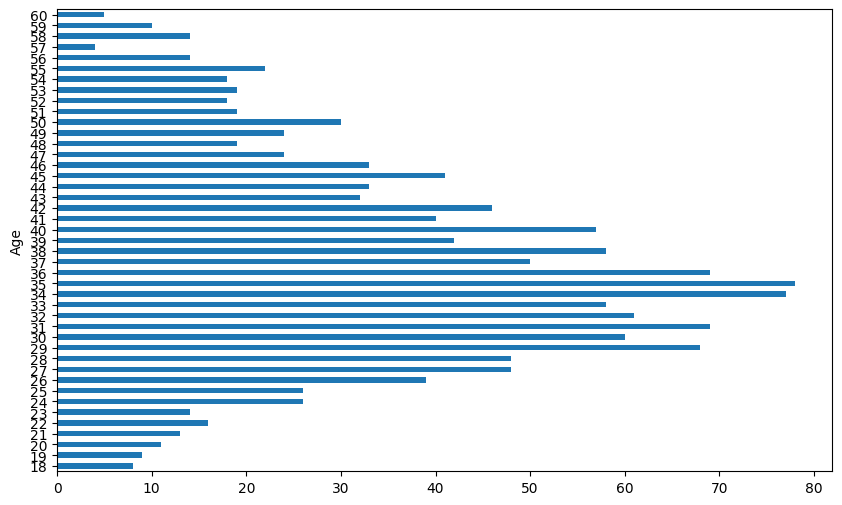

In [1124]:
data['Age'].value_counts().sort_index().plot(kind='barh', figsize=(10, 6))

Donc on peux choisir une devision par exemple on peux choisir quand le pas change de maniere exponontientlle par exemple:

18 -> 23

24 -> 28

29 -> 36

37 -> 45

46-> 60
 

In [1125]:
def categorize_age(age):
    if age >= 18 and age <= 23:
        return 'Teenager'
    elif age > 23 and age <= 28:
        return 'YoungAdult'
    elif age > 28 and age <= 36:
        return 'Adult'
    elif age > 36 and age <= 45:
        return 'MiddleAge'
    else:
        return 'Senior'

In [1126]:
data['Age type'] = data['Age'].apply(categorize_age)


age_type_percentages = data['Age type'].value_counts(normalize=True) * 100

# Print the percentages
print(f"{age_type_percentages}round(2)%")

data = data.drop(labels = ['Age type'], axis = 1)

Age type
Adult         36.734694
MiddleAge     27.142857
Senior        18.571429
YoungAdult    12.721088
Teenager       4.829932
Name: proportion, dtype: float64round(2)%


Alors partie des adults et le plus pertnant apres MiddleAge puis Senior apres YoungAdult puis Teenager

In [1127]:
data.dtypes

Age                            int64
BusinessTravel              category
DailyRate                      int64
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EmployeeNumber                 int64
EnvironmentSatisfaction        int64
Gender                      category
HourlyRate                     int64
JobInvolvement                 int64
JobLevel                       int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
MonthlyRate                    int64
NumCompaniesWorked             int64
OverTime                    category
PercentSalaryHike              int64
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TotalWorkingYears              int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
Y

In [1128]:
data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

Senior ans préfère généralement sécuriser leur emploi par rester dans la même entreprise !! environs de parmis 100 personne chosiir de quite on a 39 personne sont adultes apres on a partie de YoungAdult c'est qui on peux explqiuer par que les personnes dans cette partie de la vaie cherche des nouvelles chanlenge.

Adult présente le taux d'attrition le plus élevé par rapport aux autres groupes d'âge.

In [1129]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,0


<p style="color:red; font-weight:bold; font-size: 30px">Business Travel Analytics</p>

In [1130]:
table_df('BusinessTravel')


C:\Users\Anass\AppData\Local\Temp\ipykernel_3172\3221265907.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature = data.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})


,BusinessTravel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Non-Travel,150,12,8.000000,5.063291
1,Travel_Frequently,277,69,24.909747,29.113924
2,Travel_Rarely,1043,156,14.956855,65.822785


Donc nous avons parmis tous els emplayer presque 70% (1043/1470) alors une grand nombre de masse des emplayer sasn rarement voyager.

parmis tous les personnes qui sont attribuer l'emploi nous avons 65% (156/237) sont des personnes rarement voyager et 0.29% sont des voyeger frequnete .

Le pourcenatges des personnes qui sont voyager rarement et sont attribted est: 15% (156/1043)

Le pourcenatges des personnes qui sont voyager frequement et sont attribted est: 25% (69/277)

Les **employés qui ne voyagent pas** dans leur poste actuel ont le taux d'attrition le plus bas, soit 8 %.

In [1131]:
data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

<p style="color:red; font-weight:bold; font-size: 30px">Department analytics</p>

In [1132]:
table_df('Department')

C:\Users\Anass\AppData\Local\Temp\ipykernel_3172\3221265907.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature = data.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})


,Department,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,63,12,19.047619,5.063291
1,Research & Development,961,133,13.839750,56.118143
2,Sales,446,92,20.627803,38.818565


Alors premire remarque que le nombres des emplayer dans entreprise est grande dans le departement de Research & Development PUIS Sales et a la fin HR.

Parmis tous les emplayer qui sont travailler dans le Departement de Research & Development on a 13% ont quitter l'entreprise et parmis tous les emplayer ca equivalent a dire que pamris tous els emplayer qui sont quiter l'entreprise on a 56% ont travallent dans le Departement de Research & Development apreson a 38% sont travalllent dans le departement de sales er a la fin sui sont travailler dans le depatrteme,t de sales avec un pourcentage HR.

Le **Département des ventes** a été le plus touché par l'attrition. Car 20,6 % de ses employés ont quitté l'organisation. C'est le chiffre le plus élevé par rapport aux deux autres départements

In [1133]:
data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

<p style="color:red; font-weight:bold; font-size: 30px">Distance From Home</p>

In [1134]:
table_df('DistanceFromHome')

,DistanceFromHome,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,208,26,12.500000,10.970464
1,2,211,28,13.270142,11.814346
2,3,84,14,16.666667,5.907173
3,4,64,9,14.062500,3.797468
4,5,65,10,15.384615,4.219409
5,6,59,7,11.864407,2.953586
6,7,84,11,13.095238,4.641350
7,8,80,10,12.500000,4.219409
8,9,85,18,21.176471,7.594937
9,10,86,11,12.790698,4.641350


In [1135]:
def distance_from_home_label(a):
    if pd.isna(a):
        return 'Missing'
    elif a >= 1 and a <= 2:
        return '[1-2]km'
    elif a >= 3 and a <= 10:
        return '[3-10]km'
    elif a > 10:
        return '[+10]km'

for a in range(0, len(data)):
    data.loc[a, 'distance_from_home_label'] = distance_from_home_label(data.loc[a, 'DistanceFromHome'])

data['distance_from_home_label'].value_counts(dropna=False)



distance_from_home_label
[3-10]km    607
[+10]km     444
[1-2]km     419
Name: count, dtype: int64

In [1136]:
table_df('distance_from_home_label')

,distance_from_home_label,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,[+10]km,444,93,20.945946,39.240506
1,[1-2]km,419,54,12.887828,22.784810
2,[3-10]km,607,90,14.827018,37.974684


Alors le grand pourcentages des emplayer dans entreprise sont qui sont se trouve entre 3 et km sitrance entre sa maison et le bureat de travaille.

pamris les personnes qui sont avec une distance de +10km par rapport au centre de travaille on a 20% ont quitter le travaille. apres on a les personnes qui sont aune distance de 3-10km avec un pourcentage de 14%.

par rapport au nombre des attribution on a 39% sont les personnes qui sont situer apres 10km de distance apres on a 37% sont le spersonnes avev une distance de 3-10km.

In [1137]:
data.columns


Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'distance_from_home_label'],
      dtype='object')

<p style="color:red; font-weight:bold; font-size: 30px">Education</p>

In [1138]:
data['Education_level_label'] = ['Below College' if x == 1 else 'College' if x == 2 else 'Bachelor' if x == 3 else 'Master' if x == 4 else 'Doctor' if x == 5 else 'Unknown' for x in data['Education']]
table_df('Education_level_label')

,Education_level_label,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Bachelor,572,99,17.307692,41.772152
1,Below College,170,31,18.235294,13.080169
2,College,282,44,15.602837,18.565401
3,Doctor,48,5,10.416667,2.109705
4,Master,398,58,14.572864,24.472574


Alors la majoriter des emplayer ont comme niveaux d'education bachelor apres master apres college puis Below college et a la fin doctorat.

parmis les employer qui sont des Below College on a 18% sont quitter leur emplois apres nous avons les bachelor avec un pourcentage de 17% puis college avec 15%.

pamris tous les employer attribuer  osua vons 41% sont desbachelor et 24% sont des master apres 18% sont des collge niveaux.

<p style="color:red; font-weight:bold; font-size: 30px">EducationField</p>

In [1139]:
table_df('EducationField')

C:\Users\Anass\AppData\Local\Temp\ipykernel_3172\3221265907.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature = data.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})


,EducationField,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Human Resources,27,7,25.925926,2.953586
1,Life Sciences,606,89,14.686469,37.552743
2,Marketing,159,35,22.012579,14.767932
3,Medical,464,63,13.577586,26.582278
4,Other,82,11,13.414634,4.641350
5,Technical Degree,132,32,24.242424,13.502110


La majoriter des emplayer sont dans le doamine de life science apres medical et marketing.

parmis tous les personnes qui sont attritier on a 37% sont qui ont une education dans le domaine de life science et 26% ont dans le domaine de medical. mais ils ne represnte dnas sont domaine que respectivement 14% et 22%.

Parmis tous les emplayer qui ont une education dans HR ou bien technical degree ou bien marketing nosu sont le pourcenatge de attrition est respectivement 25%, 24% et 22%.

<p style="color:red; font-weight:bold; font-size: 30px">Environment Satisfaction</p>

In [1140]:
data['EnvironmentSatisfaction_lavel_label'] = ['low' if x == 1 else 'medium' if x == 2 else 'high' if x == 3 else 'very high' for x in data['EnvironmentSatisfaction']]
table_df('EnvironmentSatisfaction_lavel_label')

,EnvironmentSatisfaction_lavel_label,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,high,453,62,13.686534,26.160338
1,low,284,72,25.352113,30.379747
2,medium,287,43,14.982578,18.143460
3,very high,446,60,13.452915,25.316456


Alors le nombre totales des emplayer sont satisfait.

Pamis tous emeplayer qui sont attrition on a 30% ont une satisfaction faible ce qui est logique. mais pour les personnes qui sont pas satisfait nous avons en totale 51.47% (26.15 + 25.31) sont satisfait mais aussi quitte le travaille !!!

Parmis tous emplayer qui sont non satisfait on a 25% ont quitter leur travaille.

Alors la satisfaction des client pas la raison principale pour que les emplayer quittent l'entreprise.



<p style="color:red; font-weight:bold; font-size: 30px">Gender</p>

In [1141]:
table_df('Gender')

C:\Users\Anass\AppData\Local\Temp\ipykernel_3172\3221265907.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature = data.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})


,Gender,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Female,588,87,14.795918,36.708861
1,Male,882,150,17.006803,63.291139


parmis le nombre totales des employer nous avons 60% sont des hommes et 40% sont des femmes.

**Les employés de sexe masculin** sont plus susceptibles de quitter l’entreprise que les **employées de sexe féminin**.

<p style="color:red; font-weight:bold; font-size: 30px">JobInvolvement</p>

In [1142]:
data['JobInvolvement_attrition'] = ['low' if x == 1 else 'medium' if x == 2 else 'high' if x == 3 else 'very high' for x in data['JobInvolvement']]

table_df('JobInvolvement_attrition')



,JobInvolvement_attrition,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,high,868,125,14.400922,52.742616
1,low,83,28,33.734940,11.814346
2,medium,375,71,18.933333,29.957806
3,very high,144,13,9.027778,5.485232


Parlis tous les personnes qui sont quitter l'entreprise nosu avons 58% sont les personnes qui sont un niveuax d'implication elever ou tres elever dans le travaille mais il ne represente que 23% des employees, apres nous trouver 30% pour les pesonnes qui ont un niveaux d'imlication meduim. 

parmis tous les personnes qui ne aide pas boucoups dans l'entreprise nous avons 33% ont quitte l'entreprise 

<p style="color:red; font-weight:bold; font-size: 30px">JobLevel</p>

In [1143]:
data['JobLevel_attrition'] = ['low' if x == 1 else 'medium' if x == 2 else 'high' if x == 3 else 'very high' for x in data['JobLevel']]

table_df('JobLevel_attrition')


,JobLevel_attrition,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,high,218,32,14.678899,13.502110
1,low,543,143,26.335175,60.337553
2,medium,534,52,9.737828,21.940928
3,very high,175,10,5.714286,4.219409


On a la valeurs des attritions sont seuelment dans le niveux des trvailles les plus bas.

Alors plus le niveau de travaille diminue plus on a une grand probabilite que l'emplayeur peut quitter sans travaille.



<p style="color:red; font-weight:bold; font-size: 30px">JobRole</p>

In [1144]:
table_df('JobRole')


C:\Users\Anass\AppData\Local\Temp\ipykernel_3172\3221265907.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature = data.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})


,JobRole,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Healthcare Representative,131,9,6.870229,3.797468
1,Human Resources,52,12,23.076923,5.063291
2,Laboratory Technician,259,62,23.938224,26.160338
3,Manager,102,5,4.901961,2.109705
4,Manufacturing Director,145,10,6.896552,4.219409
5,Research Director,80,2,2.500000,0.843882
6,Research Scientist,292,47,16.095890,19.831224
7,Sales Executive,326,57,17.484663,24.050633
8,Sales Representative,83,33,39.759036,13.924051


Le grand pourcentgaes des poste de travialle nosu avons Sales Executive	 et Research Scientist puis Laboratory Technician.

parmis tous les personnes qui sont travialler comme Sales Representative nosua vons 40% ont quitte leur travaille. apres nosu trouve les emplyeer dans le poste de Human Resources et Laboratory Technician avec un pourcentage respectivemet 23% et 24% parmis tos les personnes qui travaille dans le meme poste.

parmis tous les personnes qui quitent l'entreprise nous avons 26% sont travaillent comme Laboratory Technician et cette valeur represente 24% parmis tous les traville dans cette  role. 

le poste de manager a le minimume valeurs des personnes qui sont travaille dans ce poste et choisir de quitte l'entreprise avce un pourcenateg de 2.5% et Manager a la valuer minimale des perosonnes qui quite l'entrpro=ise par rapoort a  tous le sautres postes.

<p style="color:red; font-weight:bold; font-size: 30px">JobSatisfaction</p>

In [1145]:
data['JobSatisfaction_attrition'] = ['low' if x == 1 else 'medium' if x == 2 else 'high' if x == 3 else 'very high' for x in data['JobSatisfaction']]

table_df('JobSatisfaction_attrition')


,JobSatisfaction_attrition,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,high,442,73,16.515837,30.801688
1,low,289,66,22.837370,27.848101
2,medium,280,46,16.428571,19.409283
3,very high,459,52,11.328976,21.940928


le nombres des empaler quis ont satisafait represente presque 61%

par rapport a la totalites des personnes attritier nous avons 30% sont des personnes satisfait Donc on peux dire que la satisfaction n'est pas la raison principale de attritions.

<p style="color:red; font-weight:bold; font-size: 30px">MaritalStatus</p>

In [1146]:
table_df('MaritalStatus')


C:\Users\Anass\AppData\Local\Temp\ipykernel_3172\3221265907.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature = data.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})


,MaritalStatus,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,Divorced,327,33,10.091743,13.924051
1,Married,673,84,12.481426,35.443038
2,Single,470,120,25.531915,50.632911


la majoriter des employers sont marrier puis on trouve le singles et a la fin on a les personnes qui sont divorcee.

parmis tous les employer attribuer l'emploie nous avons 25% sont  celebataire

<p style="color:red; font-weight:bold; font-size: 30px">MonthlyIncome</p>

In [1147]:
data[data['MonthlyIncome'] > 18061]['MonthlyIncome'].value_counts()

MonthlyIncome
19094    1
19187    1
19237    1
19627    1
19626    1
        ..
19189    1
19859    1
18430    1
19246    1
18880    1
Name: count, Length: 67, dtype: int64

In [1148]:
data['MonthlyIncome'].max() # 19999
data['MonthlyIncome'].min() # 1009
def MonthlyIncome_level(a):
    if a >= 1000 and a <= 2000:
        return "[1000 - 2000]"
    elif a >= 2001 and a <= 3000:
        return "[2001 - 3000]"
    elif a >= 3001 and a <= 4000:
        return "[3001 - 4000]"
    elif a >= 4001 and a <= 5000:
        return "[4001 - 5000]"
    elif a >= 5001 and a <= 6000:
        return "[5001 - 6000]"
    elif a >= 6001 and a <= 7000:
        return "[6001 - 7000]"
    elif a >= 7001 and a <= 8000:
        return "[7001 - 8000]"
    elif a >= 8001 and a <= 9000:
        return "[8001 - 9000]"
    elif a >= 9001 and a <= 10000:
        return "[9001 - 10000]"
    elif a >= 10001 and a <= 11000:
        return "[10001 - 11000]"
    elif a >= 11001 and a <= 12000:
        return "[11001 - 12000]"
    elif a >= 12001 and a <= 13000:
        return "[12001 - 13000]"
    elif a >= 13001 and a <= 14000:
        return "[13001 - 14000]"
    elif a >= 14001 and a <= 15000:
        return "[14001 - 15000]"
    elif a >= 15001 and a <= 16000:
        return "[15001 - 16000]"
    elif a >= 16001 and a <= 17000:
        return "[16001 - 17000]"
    elif a >= 17001 and a <= 18000:
        return "[17001 - 18000]"
    elif a >= 18001 and a <= 19000:
        return "[18001 - 19000]"
    elif a >= 19001 and a <= 20000:
        return "[19001 - 20000]"
    else:
        return "Outside Range"

data['MonthlyIncome_level'] = data['MonthlyIncome'].apply(MonthlyIncome_level)



In [1149]:
table_df('MonthlyIncome_level').sort_values(by='% of Attrition in the Relevant Group',ascending=False)


,MonthlyIncome_level,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,[1000 - 2000],33,18,54.545455,7.594937
11,[2001 - 3000],362,95,26.243094,40.084388
3,[12001 - 13000],10,2,20.000000,0.843882
1,[10001 - 11000],66,13,19.696970,5.485232
18,[9001 - 10000],52,9,17.307692,3.797468
12,[3001 - 4000],148,24,16.216216,10.126582
16,[7001 - 8000],54,7,12.962963,2.953586
13,[4001 - 5000],206,26,12.621359,10.970464
17,[8001 - 9000],48,6,12.500000,2.531646
14,[5001 - 6000],165,16,9.696970,6.751055


la valeurs de monthly income le plus identique  entre les employer est entre [2001 - 3000]$ 

parmis les personnes qui sont un income entre 1000 et 2000$ nous avons 54% sont quiter le travaille mais cette pourcentage ne presente que 7% des personnes qui sont quitte l'emploi .

parmis les personnes qui sont quitter leur traville nous avons 40% de spersonnes ons un incame entre [2001 et 3000]$ 

Pour les employer ent un income entre [14001 et 18000]$ ne quitte pas leurs emploi mais la valeurs augmente pour incame entre [9001 - 13000]$

<p style="color:red; font-weight:bold; font-size: 30px">NumCompaniesWorked</p>

In [1150]:
def NumCompaniesWorked_level(a):
    if a == 0:
        return "No prior experience"
    elif a == 1:
        return "1 years"
    elif a == 2:
        return "2 years"
    elif a == 3:
        return "3 years"
    elif a == 4:
        return "4 years"
    else:
        return "+5 years"

data["NumCompaniesWorked_level"] = data["NumCompaniesWorked"].apply(NumCompaniesWorked_level)

data["NumCompaniesWorked_level"].value_counts()


NumCompaniesWorked_level
1 years                521
+5 years               308
No prior experience    197
3 years                159
2 years                146
4 years                139
Name: count, dtype: int64

In [1151]:
table_df('NumCompaniesWorked_level')

,NumCompaniesWorked_level,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,+5 years,308,67,21.753247,28.270042
1,1 years,521,98,18.809981,41.350211
2,2 years,146,16,10.958904,6.751055
3,3 years,159,16,10.062893,6.751055
4,4 years,139,17,12.230216,7.172996
5,No prior experience,197,23,11.675127,9.704641


Donc le grand pourcenatges des emplayees c'est les emplyer avec une seule companier avant d'experience apres on trouve les emplayer avec +5 anncompagnie avant.

parmis tous les attribier nous avons 41% ont une seule 1 compagine d'experince et 28% on plus de 5 entreprise traviller cher luis avant.



<p style="color:red; font-weight:bold; font-size: 30px">OverTime</p>

In [1152]:
table_df("OverTime")

C:\Users\Anass\AppData\Local\Temp\ipykernel_3172\3221265907.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  feature = data.groupby(x).agg({'Attrition':['size', 'sum', 'mean']})


,OverTime,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,No,1054,110,10.436433,46.413502
1,Yes,416,127,30.528846,53.586498


71% des emplayer ne fait pas des overtime .

parmis tous les personnes qui sont attrituer l'emplois nous avons 46% ne fait pas des heurs supplimentaire et 53% fait des overtime.

parmis tous les employer realiser des heures supplimentaire 30% quitte l'emploi apres

In [1153]:
(1054)/(1054+416)

0.7170068027210884

<p style="color:red; font-weight:bold; font-size: 30px">PercentSalaryHike</p>

In [1154]:
table_df("PercentSalaryHike")

,PercentSalaryHike,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,11,210,41,19.523810,17.299578
1,12,198,33,16.666667,13.924051
2,13,209,34,16.267943,14.345992
3,14,201,24,11.940299,10.126582
4,15,101,18,17.821782,7.594937
5,16,78,14,17.948718,5.907173
6,17,82,14,17.073171,5.907173
7,18,89,13,14.606742,5.485232
8,19,76,9,11.842105,3.797468
9,20,55,7,12.727273,2.953586


11 -> 15
16 -> 19
20 -> 22
23 -> 25


In [1155]:
def PercentSalaryHike_level_func(a):
    if a >= 11 and a <= 15:
        return "[11 - 15]"
    elif a >= 16 and a <= 19:
        return "[16 - 19]"
    elif a >= 20 and a <= 22:
        return "[20 - 22]"
    elif a >= 23 and a <= 25:
        return "[23 - 25]"
    else:
        return "Invalid input"
    
data['PercentSalaryHike_level'] = data['PercentSalaryHike'].apply(PercentSalaryHike_level_func)




In [1156]:
table_df('PercentSalaryHike_level')

,PercentSalaryHike_level,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,[11 - 15],919,150,16.322089,63.291139
1,[16 - 19],325,50,15.384615,21.097046
2,[20 - 22],159,24,15.094340,10.126582
3,[23 - 25],67,13,19.402985,5.485232


Donc 16% des employer ont comme PercentSalire enetre [11-15] ont quitte l'entreprise est cette pourcentage represnte 63% de totales des attritions

Et les personnes qui ont un PercentSalire enetre [11-15] son pourcnatges est 19% aussi quitte l'entreprise on peux represnter par chercher une dernier post par un salaire plus grand que salire actuel avant départ à la retraite grace a son experience

<p style="color:red; font-weight:bold; font-size: 30px">PerformanceRating</p>

In [1157]:
table_df("PerformanceRating")

,PerformanceRating,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,3,1244,200,16.077170,84.388186
1,4,226,37,16.371681,15.611814


les employees avec un peroformance d'indice = 3  on plus grand probabilite de quiter l'entreprise

<p style="color:red; font-weight:bold; font-size: 30px">RelationshipSatisfaction</p>

In [1158]:
data.RelationshipSatisfaction.value_counts()

RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [1159]:
data['RelationshipSatisfaction_level'] = ['low' if x == 1 else 'medium' if x == 2 else 'high' if x == 3 else 'very high' for x in data['RelationshipSatisfaction']]
table_df("RelationshipSatisfaction_level")



,RelationshipSatisfaction_level,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,high,459,71,15.468410,29.957806
1,low,276,57,20.652174,24.050633
2,medium,303,45,14.851485,18.987342
3,very high,432,64,14.814815,27.004219


les personnes ont un relationship satisfaction avec les autres employeer petite 20% parmis elles quitte l'emploi. represntent 24% de tous les personnes qui ont quitter l'entreprise. **Les niveaux de satisfaction plus faibles sont donc fortement corrélés à une plus grande probabilité de départ.**

les personnes on une relation avec les autres forte ou bien tres forte represente le pourcentage le plus grand envison 57% mais en termes des groupes envirions 29% seulement.

<p style="color:red; font-weight:bold; font-size: 30px">StockOptionLevel</p>

In [1160]:
table_df("StockOptionLevel")

,StockOptionLevel,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,631,154,24.405705,64.978903
1,1,596,56,9.395973,23.628692
2,2,158,12,7.594937,5.063291
3,3,85,15,17.647059,6.329114


Alors plus le nombre totale des attrition c'est pour les personnes ont comme stockOptionlevel = 0 et il represnte dans son groupe pourcentage de 24%.


<p style="color:red; font-weight:bold; font-size: 30px">TotalWorkingYears</p>

In [1161]:
import pandas as pd
import pandas as pd
table_df("TotalWorkingYears")
# group_names = ['1', '2-5', '6-10', '11-15', '16-20', '20+']


def TotalWorkingYears_func(a):
    if a <= 1 and a >= 0:
        return "[0 -1]"
    elif a <= 5 and a >= 2:
        return "[2 -5]"
    elif a <= 10 and a >= 6:
        return "[6 -10]"
    elif a <= 15 and a >= 11:
        return "[11 -15]"
    elif a <= 20 and a >= 16:
        return "[16 -20]"
    elif a >= 20:
        return "[20+]"
    else:
        return "NaN"

data['TotalWorkingYears_level'] = data['TotalWorkingYears'].apply(TotalWorkingYears_func)

table_df("TotalWorkingYears_level")


,TotalWorkingYears_level,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,[0 -1],92,45,48.913043,18.987342
1,[11 -15],191,24,12.565445,10.126582
2,[16 -20],149,15,10.067114,6.329114
3,[2 -5],224,46,20.535714,19.409283
4,[20+],207,16,7.729469,6.751055
5,[6 -10],607,91,14.991763,38.396624


Donc 49% des personnes qui sont travaille une annee ou bien moi en une grand probabilite de quitter l'entreprise.
On trouve la valeurs des personnes qui quite l'entrprise minimale pour les personnes qui ont des annee de travaille plus de 20ans 

48% -> 21% -> 15% -> 13% -> 10% -> 7%

Alors la valeurs des personnes qui decide de quiter l'emploi apr rapport a son groupe deminut plus que le nombre des annee de traville augment !!!


<p style="color:red; font-weight:bold; font-size: 30px">TrainingTimesLastYear</p>

In [1162]:
table_df('TrainingTimesLastYear')

,TrainingTimesLastYear,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,54,15,27.777778,6.329114
1,1,71,9,12.676056,3.797468
2,2,547,98,17.915905,41.350211
3,3,491,69,14.052953,29.113924
4,4,123,26,21.138211,10.970464
5,5,119,14,11.764706,5.907173
6,6,65,6,9.230769,2.531646


Les employés qui ont suivi **2 et 3 formations l'année dernière** ont respectivement le taux d'attrition le plus élevé et ces deux taux d'attrition représentent 70,5 % de l'ensemble des départs de l'entreprise. Les employés qui n'ont pas suivi de formation au préalable ont le taux d'attrition le plus élevé de leur groupe individuel.

<p style="color:red; font-weight:bold; font-size: 30px">WorkLifeBalance</p>

In [1163]:
table_df("WorkLifeBalance")

,WorkLifeBalance,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,1,80,25,31.250000,10.548523
1,2,344,58,16.860465,24.472574
2,3,893,127,14.221725,53.586498
3,4,153,27,17.647059,11.392405


En outre, le groupe avec un mauvais équilibre entre vie professionnelle et vie privée a le pourcentage d'attrition le plus élevé de son groupe individuel.

<p style="color:red; font-weight:bold; font-size: 30px">YearsAtCompany</p>

In [1164]:
def YearsAtCompany_func(a):
    if a <= 0:
        return "[0]"
    elif a <= 5 and a >= 1:
        return "[1 -5]"
    elif a <= 10 and a >= 6:
        return "[6 -10]"
    elif a <= 15 and a >= 11:
        return "[11 -15]"
    elif a <= 20 and a >= 16:
        return "[16 -22]"
    elif a >= 20 and a<= 40:
        return "[20 -40]"
    else:
        return "NaN"

data["YearsAtCompany_level"] = data["YearsAtCompany"].apply(YearsAtCompany_func)


In [1165]:
table_df("YearsAtCompany_level")

,YearsAtCompany_level,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,[0],44,16,36.363636,6.751055
1,[1 -5],732,146,19.945355,61.603376
2,[11 -15],108,7,6.481481,2.953586
3,[16 -22],72,5,6.944444,2.109705
4,[20 -40],66,8,12.121212,3.375527
5,[6 -10],448,55,12.276786,23.206751


Les employés ayant une année ou moins d'expérience professionnelle dans l'entreprise ont le pourcentage d'attrition le plus élevé dans leur groupe d'expérience individuel (34,9 % d'attrition dans le groupe concerné). En outre, le nombre d'attritions le plus élevé, soit 87 employés, se situe dans la catégorie des employés ayant entre 2 et 5 ans d'expérience professionnelle dans l'entreprise et représente 36,7 % de l'ensemble des attritions dans l'entreprise.

In [1166]:
data.YearsInCurrentRole.value_counts()

YearsInCurrentRole
2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
Name: count, dtype: int64

<p style="color:red; font-weight:bold; font-size: 30px">YearsInCurrentRole</p>

In [1167]:
#group_names = ['1', '2-4', '5-6', '7', '8-10', '10+']             

def YearsAInCurrentRole_func(a):
    if a == 1 or a== 0:
        return "[0-1]"
    elif a >= 2 and a <= 4:
        return "[2-4]"
    elif a >= 5 and a <= 6:
        return "[5-6]"
    elif a == 7:
        return "[7]"
    elif a >= 8 and a <= 10:
        return "[8-10]"
    else:
        return "[10+]"

data["YearsInCurrentRole_lable"] = data["YearsInCurrentRole"].apply(YearsAInCurrentRole_func)
table_df("YearsInCurrentRole_lable")


,YearsInCurrentRole_lable,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,[0-1],301,84,27.906977,35.443038
1,[10+],78,5,6.410256,2.109705
2,[2-4],611,99,16.202946,41.772152
3,[5-6],73,3,4.109589,1.265823
4,[7],222,31,13.963964,13.080169
5,[8-10],185,15,8.108108,6.329114


Donc 35% des personnes qui quiteent leurs traville ont comme nombre des annee dans le role actuelle 1ans ou bien moin. cette valeur represente dans ca groupe 27% des personnes. 
ALors Les employés qui n'ont pas accompli leur première année et qui occupent leur poste actuel sont plus susceptibles de quitter l'entreprise. Cela peut être dû à un défi ou à un manque de satisfaction dans leur poste actuel. 

Les employés qui ont 2 à 5 ans d'expérience dans cette entreprise représentent le pourcentage et le nombre maximum d'attrition dans l'entreprise. 


<p style="color:red; font-weight:bold; font-size: 30px">YearsAtCompany</p>

In [1168]:
def YearsAtCompany_func(a):
    if a== 0:
        return "[0]"
    elif a >= 1 and a <= 5:
        return "[1-5]"
    elif a >= 6 and a <= 9:
        return "[6-9]"
    elif a == 10:
        return "[10]"
    elif a >= 11 and a <= 22:
        return "[11-22]"
    elif a >= 23 and a <= 44:
        return "[23-44]"
    else:
        return "[45+]"

data["YearsAtCompany_label"] = data["YearsAtCompany"].apply(YearsAtCompany_func)


In [1169]:
table_df("YearsAtCompany_label")


,YearsAtCompany_label,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,[0],44,16,36.363636,6.751055
1,[1-5],732,146,19.945355,61.603376
2,[10],120,18,15.000000,7.594937
3,[11-22],209,14,6.698565,5.907173
4,[23-44],37,6,16.216216,2.531646
5,[6-9],328,37,11.280488,15.611814


Donc parmis les emplyaer ont moi d'une ans dans l'entreprise 36% de ces personnes ont quitte l'emploi. Les employés qui n'ont pas accompli leur première année et qui occupent leur poste actuel sont plus susceptibles de quitter l'entreprise. Cela peut être dû à un défi ou à un manque de satisfaction dans leur poste actuel. 


pamris tous les attritions nous avons 61% ont dans l'entreprise entre 1ans et 5ans d'annee mais paramis le groupe qui represnte seulement 16%. on peux dire que sont les personnes qui cherche des nouvelle defit.



<p style="color:red; font-weight:bold; font-size: 30px">YearsSinceLastPromotion</p>

In [1170]:
table_df("YearsSinceLastPromotion")

,YearsSinceLastPromotion,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,0,581,110,18.932874,46.413502
1,1,357,49,13.725490,20.675105
2,2,159,27,16.981132,11.392405
3,3,52,9,17.307692,3.797468
4,4,61,5,8.196721,2.109705
5,5,45,2,4.444444,0.843882
6,6,32,6,18.750000,2.531646
7,7,76,16,21.052632,6.751055
8,8,18,0,0.000000,0.000000
9,9,17,4,23.529412,1.687764


<p style="color:red; font-weight:bold; font-size: 30px">YearsWithCurrManager</p>

In [1171]:
def YearsWithCurrManager_func(a):
    if a == 0:
        return "[0]"
    elif a == 1:
        return "[1]"
    elif a ==2:
        return "[2]"
    elif a == 3:
        return "[3]"
    elif a == 4:
        return "[4]"
    elif a >= 5 and a <= 6:
        return "[5-6]"
    elif a == 7:
        return "[7]"
    elif a == 8:
        return "[8]"
    elif a == 9:
        return "[9]"
    elif a >= 10 and a <= 13:
        return "[10-13]"
    else:
        return "[14-17]"
    
data["YearsWithCurrManager_level"] = data["YearsWithCurrManager"].apply(YearsWithCurrManager_func)

table_df("YearsWithCurrManager_level")



,YearsWithCurrManager_level,Total Employee,Attrition Number,% of Attrition in the Relevant Group,% of Attrition in the Company
0,[0],263,85,32.319392,35.864979
1,[10-13],81,4,4.938272,1.687764
2,[14-17],19,2,10.526316,0.843882
3,[1],76,11,14.473684,4.641350
4,[2],344,50,14.534884,21.097046
5,[3],142,19,13.380282,8.016878
6,[4],98,11,11.224490,4.641350
7,[5-6],60,8,13.333333,3.375527
8,[7],216,31,14.351852,13.080169
9,[8],107,10,9.345794,4.219409


La plupart des employés quittent l'entreprise avant d'avoir terminé leur première année avec leur manager actuel. L'autre groupe qui quitte le plus l'entreprise est celui de ceux qui travaillent deux ans avec leur manager actuel.

Generalment plus le nombre des annee avec le maneger actuel augmente le pourcentages des employer ont chosit de quiter l'emploie augmente


In [1172]:
data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition',
       'distance_from_home_label', 'Education_level_label',
       'EnvironmentSatisfaction_lavel_label', 'JobInvolvement_attrition',
       'JobLevel_attrition', 'JobSatisfaction_attrition',
       'MonthlyIncome_level', 'NumCompaniesWorked_level',
       'PercentSalaryHike_level', 'RelationshipSatisfaction_level',
       'TotalWorkingYears_level', 'YearsAtCom

In [1173]:
data = data.drop(labels = ["YearsWithCurrManager_level","YearsAtCompany_label","YearsInCurrentRole_lable","YearsAtCompany_level","TotalWorkingYears_level","RelationshipSatisfaction_level","PercentSalaryHike_level","NumCompaniesWorked_level",'MonthlyIncome_level','distance_from_home_label','Education_level_label','EnvironmentSatisfaction_lavel_label','JobInvolvement_attrition','JobLevel_attrition','JobSatisfaction_attrition'], axis = 1)

<p style="color:yellow; font-weight:bold; font-size: 30px">Relations entre fonctionnalités et variables</p>

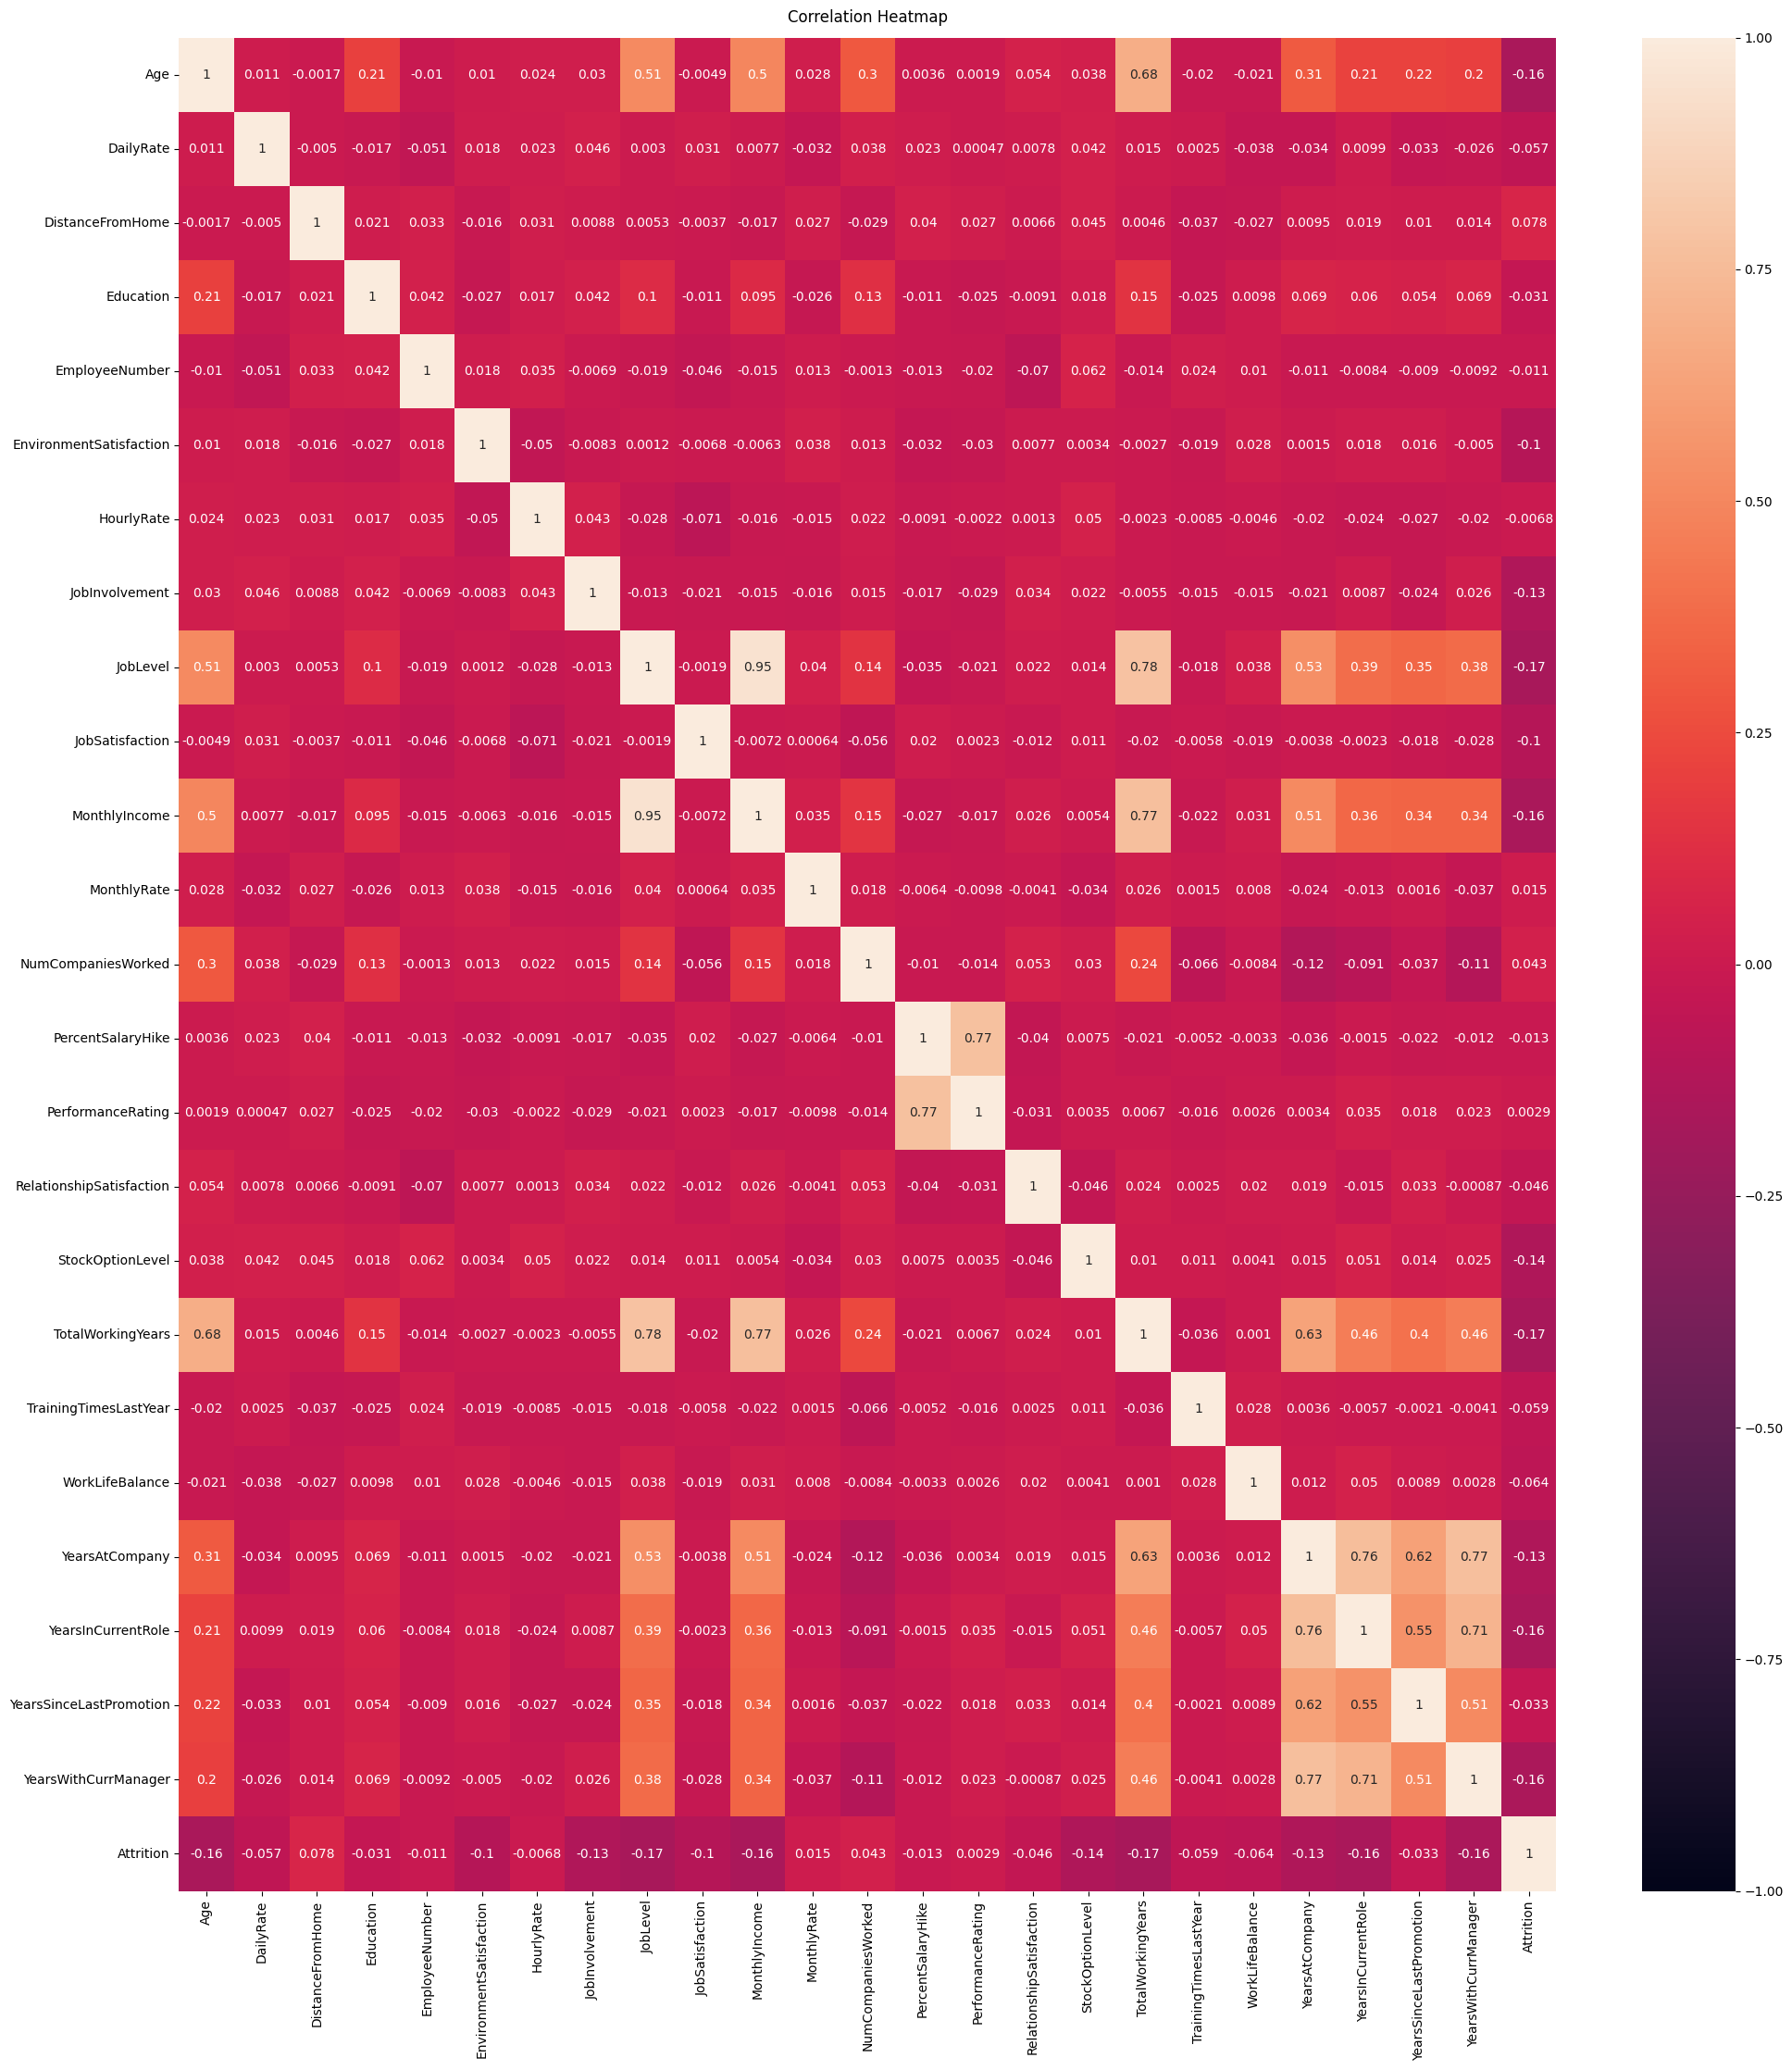

In [1174]:
numeric_data = data.select_dtypes(include=[float, int])
plt.figure(figsize=(24, 26))
heatmap = sns.heatmap(numeric_data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

Corrélations fortes :

Pourcentage d'augmentation de salaire et évaluation des performances

Nombre total d'années de travail avec revenu mensuel et niveau de poste

Nombre d'années dans l'entreprise, nombre d'années avec le responsable actuel, et nombre d'années dans le poste actuel



Corrélations modérées :

Âge a une corrélation modérée avec le nombre total d'années de travail, revenu mensuel, et niveau de poste

Niveau de poste a une corrélation modérée avec nombre d'années dans l'entreprise et âge

Nombre total d'années de travail a une corrélation modérée avec plusieurs autres caractéristiques, y compris nombre d'années depuis la dernière promotion et nombre d'années avec le responsable actuel

In [1175]:
data.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition'],
      dtype='object')

<p style="color:green; font-weight:bold; font-size: 30px">Reumee de EDA</p>


### Analyse de l'Attrition des Employés

L'analyse révèle des tendances intéressantes concernant l'attrition au sein de l'entreprise :

- **Jeunes employés (18-25 ans)** : Ils représentent 8,4 % de la main-d'œuvre et sont **plus susceptibles** de quitter l'entreprise que les autres groupes d'âge. À mesure que les salariés vieillissent, leur pourcentage d'attrition diminue.
  
- **Voyages fréquents** : 18,8 % des employés voyagent fréquemment pour leur travail, selon leur statut de **'BusinessTravel'**. Ce groupe montre le taux d'attrition le plus élevé (**25 %**). En revanche, ceux qui voyagent rarement ou jamais composent 81,1 % de l'entreprise.

- **Départements à risque** : Le service commercial (**'Department'**) est le plus touché par l'attrition, avec un taux de **20,6 %**. Les départements des ressources humaines (4,3 % de l'entreprise) et de la recherche et développement montrent des taux d'attrition de **19 %** et **13,8 %**, respectivement.

- **Distance domicile-travail** : Une plus grande distance entre l'entreprise et le domicile des employés (**'DistanceFromHome'**) est associée à un taux d'attrition plus élevé.

- **Genre** : Les employés de sexe masculin (**'Gender'**) sont **plus susceptibles** de quitter l'entreprise que leurs homologues féminins.

- **Implicaction professionnelle** : Les employés ayant une **implication professionnelle élevée/très élevée** (**'JobInvolvement'**) représentent 68,8 % de l'entreprise. Un niveau d'implication plus élevé est corrélé à une diminution du taux d'attrition.

- **Niveau d'emploi** : Les employés au **niveau d'emploi 1** (**'JobLevel'**) représentent 37 % de l'entreprise, mais affichent un taux d'attrition de **26,3 %**.

- **Heures supplémentaires** : 28,3 % des employés travaillent **des heures supplémentaires** (**'OverTime'**), et ce groupe présente un taux d'attrition de **30,5 %**.

- **Augmentation de salaire** : Un pourcentage d'augmentation de salaire (**'PercentSalaryHike'**) plus élevé est un facteur **disposant les employés à rester** plus longtemps dans l'entreprise.

- **Ancienneté** : À mesure que les années dans l'entreprise et le poste actuel augmentent (**'YearsAtCompany'**, **'YearsInCurrentRole'**), le taux d'attrition diminue.

In [1176]:
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,0


L'entreprise compte 1470 salariés. 237 salariés, soit 16% du total des salariés, ont quitté l'entreprise pour diverses raisons. En outre, 1233 salariés continuent à travailler dans la même entreprise.

<Axes: xlabel='Gender', ylabel='count'>

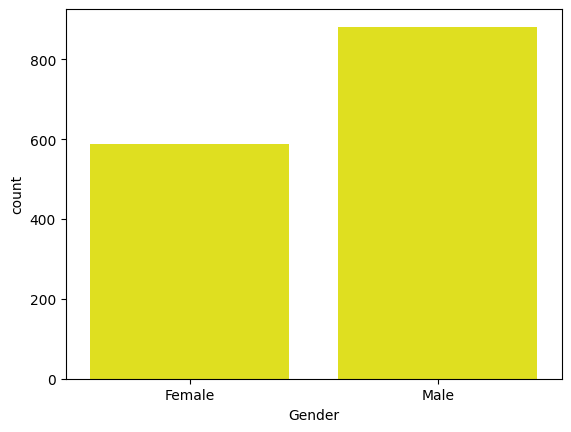

In [1177]:
sns.countplot(x='Gender', data=data,color="yellow")

<Axes: xlabel='Age', ylabel='count'>

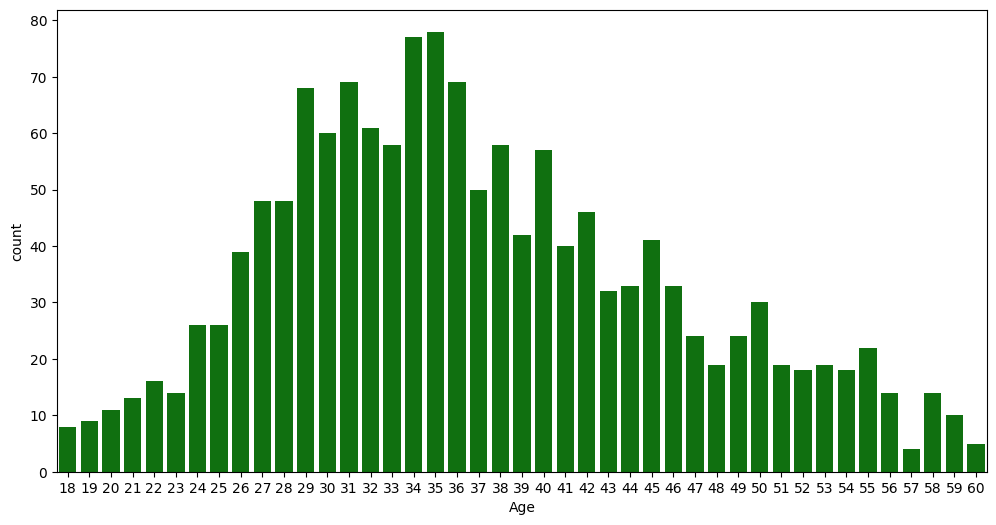

In [1178]:
plt.figure(figsize=(12,6))
sns.countplot(x='Age', data=data,color="green")

# 
<p style="color:yellow; font-weight:bold; font-size: 30px">Developpement de Modele</p>

On vas commencer par Preparation des donnees

<p style="color:red; font-weight:bold; font-size: 30px">Feature Selection</p>

EmployeeNumber est clairement une fonctionnalité non pertinente et doit être supprimée. De plus, PerformanceRating n'a eu aucun impact sur l'attrition. Comme nous l'avons noté précédemment, tous les employés ont été notés soit 3 soit 4, et les taux de turnover étaient pratiquement identiques dans les deux cas.

Bien que nous puissions envisager de supprimer certaines fonctionnalités fortement corrélées pour réduire la redondance dans le modèle, la corrélation générale est assez faible. Nous conserverons donc toutes les fonctionnalités pour l'instant. Dans le cas de fonctionnalités fortement corrélées, nous pourrions utiliser des techniques comme l'Analyse en Composantes Principales (PCA) pour réduire l'espace des caractéristiques. Nous pourrions probablement trouver d'autres colonnes à supprimer, mais cela sera fait ultérieurement en analysant les résultats de notre premier modèle de machine learning.

Et nous avons deja supprimer Over18,StandardHours et EmployeeCount.

In [1179]:
features_to_drop = [
    "DailyRate",
    "HourlyRate",
    "MonthlyRate",
    "PercentSalaryHike", 
    "YearsInCurrentRole",
    "YearsAtCompany",
    "YearsWithCurrManager",
    "TotalWorkingYears",
    "JobLevel",
    "EmployeeNumber"
]

for col in features_to_drop:
    data.drop(col, axis=1, inplace=True)

<p style="color:red; font-weight:bold; font-size: 30px">Préparation des Données</p>


In [1180]:
data.select_dtypes(include=['category']).columns


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

#### **Séparation des Données**

In [1181]:
X = data.drop(['Attrition'], axis=1)
y = data['Attrition']

X.columns = X.columns.astype(str)

data.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsSinceLastPromotion', 'Attrition'],
      dtype='object')

In [1182]:
data.dtypes

Age                            int64
BusinessTravel              category
Department                  category
DistanceFromHome               int64
Education                      int64
EducationField              category
EnvironmentSatisfaction        int64
Gender                      category
JobInvolvement                 int64
JobRole                     category
JobSatisfaction                int64
MaritalStatus               category
MonthlyIncome                  int64
NumCompaniesWorked             int64
OverTime                    category
PerformanceRating              int64
RelationshipSatisfaction       int64
StockOptionLevel               int64
TrainingTimesLastYear          int64
WorkLifeBalance                int64
YearsSinceLastPromotion        int64
Attrition                      int64
dtype: object

In [1183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [1184]:
for a in data.columns:
    if data[a].dtype == 'category':
        print(a)

BusinessTravel
Department
EducationField
Gender
JobRole
MaritalStatus
OverTime


In [1185]:
data.OverTime.unique()

['Yes', 'No']
Categories (2, object): ['No', 'Yes']

### **Encodage des Données Catégorielles**

Pour que notre modèle d'apprentissage automatique puisse traiter les données, nous devons convertir les variables catégorielles en nombres. Cette conversion peut se faire à l'aide de bibliothèques comme sklearn (en utilisant l'encodage des étiquettes ou l'encodage à chaud) ou pandas. Dans notre cas, nous choisirons d'utiliser sklearn. Nous allons transformer les colonnes textuelles suivantes en variables numériques continues : **BusinessTravel**, **Department**, **EducationField**, **Gender**, **JobRole**, **MaritalStatus**, et **Overtime**.

Pour les colonnes que nous avons mentionnées (BusinessTravel, Department, EducationField, Gender, JobRole, MaritalStatus, Overtime), la meilleure approche dépend des caractéristiques de nos données :

* **Colonnes Nominales** (sans ordre implicite) : Nous utiliserons OneHotEncoder.
* **Colonnes Ordinales** (avec ordre implicite, si applicable) : Nous utiliserons OrdinalEncoder.

### Encodage thirs github

In [1186]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']

# --- Encodage Ordinal ---
ordinal_cols = ['BusinessTravel']
ordinal_encoder = OrdinalEncoder()

data[ordinal_cols] = ordinal_encoder.fit_transform(data[ordinal_cols])



def transform(feature):
    le = LabelEncoder()
    data[feature] = le.fit_transform(data[feature])
    print(f"Classes for {feature}: {le.classes_}")

remaining_categorical_cols = [col for col in categorical_cols if col not in ordinal_cols]

for feature in remaining_categorical_cols:
    transform(feature)


Classes for Department: ['Human Resources' 'Research & Development' 'Sales']
Classes for EducationField: ['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
Classes for Gender: ['Female' 'Male']
Classes for JobRole: ['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
Classes for MaritalStatus: ['Divorced' 'Married' 'Single']
Classes for OverTime: ['No' 'Yes']


In [1187]:
data.dtypes

Age                           int64
BusinessTravel              float64
Department                    int32
DistanceFromHome              int64
Education                     int64
EducationField                int32
EnvironmentSatisfaction       int64
Gender                        int32
JobInvolvement                int64
JobRole                       int32
JobSatisfaction               int64
MaritalStatus                 int32
MonthlyIncome                 int64
NumCompaniesWorked            int64
OverTime                      int32
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsSinceLastPromotion       int64
Attrition                     int64
dtype: object

In [1188]:
data.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,...,MonthlyIncome,NumCompaniesWorked,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,Attrition
0,41,2.0,2,1,2,1,2,0,3,7,...,5993,8,1,3,1,0,0,1,0,1
1,49,1.0,1,8,1,1,3,1,2,6,...,5130,1,0,4,4,1,3,3,1,0
2,37,2.0,1,2,2,4,4,1,2,2,...,2090,6,1,3,2,0,3,3,0,1
3,33,1.0,1,3,4,1,4,0,3,6,...,2909,1,1,3,3,0,3,3,3,0
4,27,2.0,1,2,1,3,1,1,3,2,...,3468,9,0,3,4,1,3,3,2,0


#### **La normalisation**

In [1103]:
np.mean(data, axis=0)

Age                           36.923810
BusinessTravel                 1.607483
Department                     1.260544
DistanceFromHome               9.192517
Education                      2.912925
EducationField                 2.247619
EmployeeNumber              1024.865306
EnvironmentSatisfaction        2.721769
Gender                         0.600000
JobInvolvement                 2.729932
JobRole                        4.458503
JobSatisfaction                2.728571
MaritalStatus                  1.097279
MonthlyIncome               6502.931293
NumCompaniesWorked             2.693197
OverTime                       0.282993
PerformanceRating              3.153741
RelationshipSatisfaction       2.712245
StockOptionLevel               0.793878
TrainingTimesLastYear          2.799320
WorkLifeBalance                2.761224
YearsSinceLastPromotion        2.187755
Attrition                      0.161224
dtype: float64

In [1189]:
data.min()

Age                           18.0
BusinessTravel                 0.0
Department                     0.0
DistanceFromHome               1.0
Education                      1.0
EducationField                 0.0
EnvironmentSatisfaction        1.0
Gender                         0.0
JobInvolvement                 1.0
JobRole                        0.0
JobSatisfaction                1.0
MaritalStatus                  0.0
MonthlyIncome               1009.0
NumCompaniesWorked             0.0
OverTime                       0.0
PerformanceRating              3.0
RelationshipSatisfaction       1.0
StockOptionLevel               0.0
TrainingTimesLastYear          0.0
WorkLifeBalance                1.0
YearsSinceLastPromotion        0.0
Attrition                      0.0
dtype: float64

Donc il suffit d'appliquer Normalsiation pour les deux colonne: Age et MonthlyIncome                         

In [1190]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data['Age'] = scaler.fit_transform(data[['Age']])
data['MonthlyIncome'] = scaler.fit_transform(data[['MonthlyIncome']])

In [1191]:
X = data.drop("Attrition", axis=1)
y = data["Attrition"]

In [1192]:
from sklearn.model_selection import train_test_split

np.random.seed(12345)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,stratify=y)

#### **Traitement du Déséquilibre des Classes**

<Axes: xlabel='Attrition', ylabel='count'>

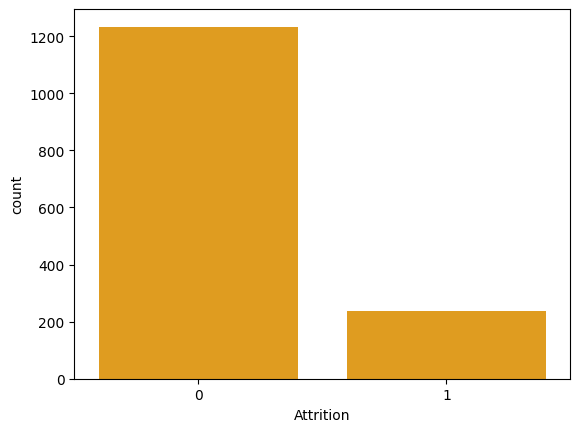

In [1193]:
sns.countplot(x='Attrition', data=data,color="orange")

Nous avons un **ensemble de données déséquilibré** avec une majorité d'observations d'un type (`Non`, qui correspond à `0` dans notre dataset). En effet, environ **84 %** des observations appartiennent à la classe `Non`, tandis que seulement **16 %** sont de la classe `Oui`. Cela illustre clairement le déséquilibre de notre ensemble de données.

### Importance du Traitement du Déséquilibre

Il est crucial de traiter ce déséquilibre, car les performances de notre modèle peuvent être considérablement affectées si nous ne le faisons pas. 

### Approches pour Traiter le Déséquilibre

Nous avons deux principales approches pour gérer les ensembles de données déséquilibrés :

- **Suréchantillonnage** : Augmente le nombre d'observations de la classe minoritaire.
- **Sous-échantillonnage** : Diminue le nombre d'observations de la classe majoritaire.

### Application de SMOTE

Pour ce projet, j'ai choisi d'utiliser une technique de **suréchantillonnage** appelée **SMOTE** (Synthetic Minority Oversampling Technique). Cette méthode génère de manière aléatoire des instances « synthétiques » de la classe minoritaire, équilibrant ainsi les observations entre les deux classes. Et on vas voire resultat pour determiner ets e que c'est le bon choix ou pas.



In [1194]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sm = SMOTE(random_state = 0)
X_train_sm,  y_train_sm = sm.fit_resample(X_train, y_train)

print('Before OverSampling, the shape of train_X: {}'.format(X_train_sm.shape))
print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))

Je vais passer les etapes est dire que quandd j'ai appliquee smotting j'ai trouver que les metric de performance sont moi par rapport quand on utilise StratifiedKFold

In [1195]:

from sklearn.model_selection import StratifiedKFold

skfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

### Application de PCA


In [1196]:
# from sklearn.decomposition import PCA
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns


# pca = PCA()
# X_train_pca = pca.fit_transform(X_train_sm)

# # Calculer la variance expliquée cumulée
# explained_variance_ratio = pca.explained_variance_ratio_
# cumulative_explained_variance = explained_variance_ratio.cumsum()

# # Tracer la courbe du coude
# plt.figure(figsize=(10, 6))
# plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
# plt.xlabel('Nombre de Composants Principaux')
# plt.ylabel('Variance Expliquée Cumulative')
# plt.title('Méthode du Coude pour PCA')
# plt.grid(True)
# plt.show()

ON remarque que pour expliquer 80% de varience de notre data nous devons utiliser presque 22 composante princiaple donc on vas pas utiliser pca pour diminuer le nombre de notres colonnes.

## Évaluation des Performances du Classificateur

Étant donné que notre ensemble de données initial était déséquilibré, il est crucial d'évaluer la performance de notre classificateur en utilisant des métriques adaptées. Après avoir appliqué la technique de **SMOTE** pour équilibrer les données et obtenir une répartition plus équitable des classes, nous devons choisir des métriques qui prennent en compte cet équilibre et qui mettent en lumière la classe minoritaire.

Dans notre cas, où la classe positive est minoritaire et la détection correcte de ces échantillons positifs est notre objectif principal (la détection correcte des exemples négatifs étant moins critique), il est pertinent de se concentrer sur les métriques telles que la **précision** et le **rappel**. Cependant, pour obtenir une évaluation globale qui combine ces deux aspects, nous utiliserons la **F1 Score**.

La F1 Score est la moyenne harmonique de la précision et du rappel. Elle est particulièrement utile lorsque nous avons besoin d'un équilibre entre la précision (la proportion d'exemples correctement classifiés parmi les exemples prévus comme positifs) et le rappel (la proportion d'exemples correctement classifiés parmi tous les exemples positifs réels).

In [1200]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import pandas as pd

def classification_tuning_multiple(X_train, y_train, X_test, y_test, models_params,skfold):
    """
    Parameters:
    - X_train: Features for training
    - y_train: Target for training
    - X_test: Features for testing
    - y_test: Target for testing
    - models_params: Dictionary of models and their corresponding hyperparameters

    Returns:
    - results_df: DataFrame containing best parameters and F1 scores for each model
    """
    results = []

    for model_name, (model, param_grid) in models_params.items():
        print(f"Training {model_name}...")
        
        # Initialize GridSearchCV with the model and parameter grid
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=skfold,
            scoring='f1',
            n_jobs=3
        )
        # Fit GridSearchCV
        grid_search.fit(X_train, y_train)

        y_pred = best_model.predict(X_test)

        # Best model
        best_model = grid_search.best_estimator_

        conf_matrix = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        print(report)

        precision = report['weighted avg']['precision']
        recall = report['c avg']['recall']
        f1_score = report['weighted avg']['f1-score']

        # Store results
        results.append({
            'Model': model_name,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score,
            'Best Parameters': grid_search.best_params_,
            'Confusion Matrix': conf_matrix
        })

    results_df = pd.DataFrame(results)
    
    print(results_df)

    return results_df

# Define models and hyperparameters
models_params = {
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': np.arange(1, 50),
        'p': [1, 2],
    }),
    'Logistic Regression': (LogisticRegression(), {
        'C': np.arange(0.1, 1000, 10),
        'solver': ['liblinear', 'lbfgs'],
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'criterion': ["gini", "entropy"],
        'splitter': ["best", "random"],
        'max_depth': np.arange(1, 33),
        'min_samples_split': [x for x in range(2, 15)],
        'min_samples_leaf': [1, 2, 4, 5, 6]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [int(x) for x in np.linspace(start=10, stop=2000, num=10)],
        'max_features': ['auto', 'sqrt'],
        'max_depth': np.arange(10, 110),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4, 5, 6]
    }),
    'Naïve Bayes': (GaussianNB(), {
    }),
    'SVM': (SVC(), {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['rbf', 'poly'],
        'gamma': [0.001, 0.01, 0.1, 1],
    })
}


f1 score: 0.6556828607282582
Tuned Model Parameters: {'C': 1}
[[242  12]
 [ 93  21]]
({'C': 1},
 array([[242,  12],
        [ 93,  21]], dtype=int64))



f1 score: 0.6530472073607866
Tuned Model Parameters: {'C': 21}
[[243  11]
 [ 94  20]]
({'C': 21},
 array([[243,  11],
        [ 94,  20]], dtype=int64))

<p style="color:red; font-weight:bold; font-size: 30px">Entrainement</p>

In [1201]:
results_df = classification_tuning_multiple(X_train, y_train, X_test, y_test, models_params,skfold)
results_df

Training KNN...
Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


### Entrainement avec smothing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import pandas as pd

def classification_tuning_multiple(X_train_sm, y_train_sm, X_test, y_test, models_params,skfold):
    """
    Parameters:
    - X_train_sm: Features for training
    - y_train_sm: Target for training
    - X_test: Features for testing
    - y_test: Target for testing
    - models_params: Dictionary of models and their corresponding hyperparameters

    Returns:
    - results_df: DataFrame containing best parameters and F1 scores for each model
    """
    results = []

    for model_name, (model, param_grid) in models_params.items():
        print(f"Training {model_name}...")
        
        # Initialize GridSearchCV with the model and parameter grid
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=skfold,
            scoring='f1',
            n_jobs=3
        )
        # Fit GridSearchCV
        grid_search.fit(X_train_sm, y_train_sm)

        y_pred = best_model.predict(X_test)

        # Best model
        best_model = grid_search.best_estimator_

        conf_matrix = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        print(report)

        precision = report['weighted avg']['precision']
        recall = report['c avg']['recall']
        f1_score = report['weighted avg']['f1-score']

        # Store results
        results.append({
            'Model': model_name,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1_score,
            'Best Parameters': grid_search.best_params_,
            'Confusion Matrix': conf_matrix
        })

    results_df = pd.DataFrame(results)
    
    print(results_df)

    return results_df

# Define models and hyperparameters
models_params = {
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': np.arange(1, 50),
        'p': [1, 2],
    }),
    'Logistic Regression': (LogisticRegression(), {
        'C': np.arange(0.1, 1000, 10),
        'solver': ['liblinear', 'lbfgs'],
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'criterion': ["gini", "entropy"],
        'splitter': ["best", "random"],
        'max_depth': np.arange(1, 33),
        'min_samples_split': [x for x in range(2, 15)],
        'min_samples_leaf': [1, 2, 4, 5, 6]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [int(x) for x in np.linspace(start=10, stop=2000, num=10)],
        'max_features': ['auto', 'sqrt'],
        'max_depth': np.arange(10, 110),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4, 5, 6]
    }),
    'Naïve Bayes': (GaussianNB(), {
    }),
    'SVM': (SVC(), {
        'C': [0.001, 0.01, 0.1, 1, 10],
        'kernel': ['rbf', 'poly'],
        'gamma': [0.001, 0.01, 0.1, 1],
    })
}


In [284]:
results_df = classification_tuning_multiple(X_train_sm, y_train, X_test, y_test, models_params,skfold)
results_df

Entraînement de KNN...
KNN entraîné avec succès.
Entraînement de Logistic Regression...
Logistic Regression entraîné avec succès.
Entraînement de Decision Tree...


c:\Users\Anass\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Decision Tree entraîné avec succès.
Entraînement de Naive Bayes...
Naive Bayes entraîné avec succès.
Entraînement de SVM...
Erreur lors de l'ajustement de SVM: Invalid parameter 'gammas' for estimator SVC(C=0.001). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
                     Precision    Recall  F1 Score
KNN                   0.371212  0.365672  0.368421
Logistic Regression   0.410112  0.544776  0.467949
Decision Tree         0.281879  0.313433  0.296820
Naive Bayes           0.372449  0.544776  0.442424


Entraînement de KNN...
KNN entraîné avec succès.
Entraînement de Logistic Regression...
Logistic Regression entraîné avec succès.
Entraînement de Decision Tree...
Decision Tree entraîné avec succès.
Entraînement de Naive Bayes...
Naive Bayes entraîné avec succès.
Entraînement de SVM...
Erreur lors de l'ajustement de SVM: Invalid parameter 'gammas' for estimator SVC(C=0.001). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].
                     Precision    Recall  F1 Score
KNN                   0.361702  0.126866  0.187845
Logistic Regression   0.578947  0.164179  0.255814
Decision Tree         0.545455  0.268657  0.360000
Naive Bayes           0.493827  0.298507  0.372093


In [269]:
best_models

{'KNN': KNeighborsClassifier(),
 'Logistic Regression': LogisticRegression(C=10.1, solver='liblinear'),
 'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=24, min_samples_leaf=5,
                        min_samples_split=14, splitter='random'),
 'Naive Bayes': GaussianNB(),
 'SVM': SVC(C=3, gamma='auto')}

<p style="color:red; font-weight:bold; font-size: 30px">Feature engenring</p>

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
y = data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(tree, X_train, y_train, X_test, y_test, train=True):
    """
    Affiche les métriques de performance d'un modèle de classification.

    Args:
        tree: Le modèle de classification.
        X: Les données d'entrée.
        y: Les étiquettes de classe.
        train:  True si on évalue sur les données d'entraînement, False sinon.
    """
    if train == True:
        y_train_pred = tree.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, y_train_pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{classification_report(y_train, y_train_pred)}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, y_train_pred)}\n")
    else:
        y_test_pred = tree.predict(X_test)
        tree_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, y_test_pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{tree_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_test_pred)}\n")

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 93.74%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1233
           1       0.80      0.82      0.81       237

    accuracy                           0.94      1470
   macro avg       0.88      0.89      0.89      1470
weighted avg       0.94      0.94      0.94      1470

_______________________________________________
Confusion Matrix: 
 [[1183   50]
 [  42  195]]

Test Result:
Accuracy Score: 79.14%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.887097   0.275362  0.791383    0.581230      0.802480
recall       0.868421   0.311475  0.791383    0.589948      0.791383
f1-score     0.877660   0.292308  0.791383    0.584984      0.796693
support    380.000000  61.000000  0.791383  441.000000    441.000000
_________________

Alors si on fait la compariason entre accuresy de traing et teste on peux voire que nous avons tomber dans un overfithing, parmis les olution pour eviter overfithing c'est de utiliser GridSearch

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4, 5],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf,
    params,
    scoring="accuracy",
    n_jobs=-1,
    verbose=1,
    cv=5
)

tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 5776 candidates, totalling 28880 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 19, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 85.24%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      1233
           1       0.69      0.16      0.25       237

    accuracy                           0.85      1470
   macro avg       0.77      0.57      0.59      1470
weighted avg       0.83      0.85      0.81      1470

_______________________________________________
Confusion Matrix: 
 [[1216   17]
 [ 200   37]]

Test Result:
Accuracy Score: 86.62%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.867277   0.750000  0.866213    0.808638      0.851055
recall       0.997368   0.0491

c:\Users\Anass\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
